In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.simplefilter('ignore')
from datetime import datetime 
from datetime import datetime as dat, timedelta
from pandas import datetime
from dateutil.relativedelta import relativedelta

In [2]:
def timeseries_conversion(path,datecol,targcol):
    df=pd.read_csv(path)
    df1=df[targcol]
    df1[datecol]=df[datecol]
    df1.dropna(how='all',inplace = True)
    df1[datecol] = pd.to_datetime(df1[datecol])
    df1[targcol] = df1[targcol].astype(float)
    #df1[exgo] = df1[exgo].astype(float)
    weeknum = df1[datecol].dt.dayofweek
    df1.set_index(datecol,inplace = True)
    return df1,weeknum
path='/home/rupeshr/Desktop/TSA_Python/dataset/multivariate_dataset.csv'
datecol='Date'
targcol=['Money','Spending']
df1,weeknum=timeseries_conversion(path,datecol,targcol)
df1.head(5)

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [11]:
link='https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
s=pd.read_csv(link)
s.head()
s.to_csv('/home/rupeshr/Desktop/TSA_Python/dataset/Raotl6.csv')

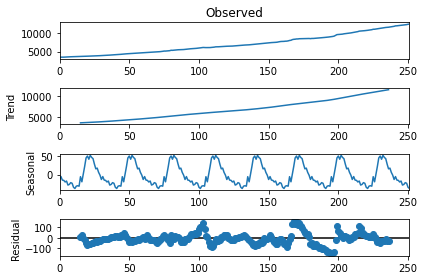

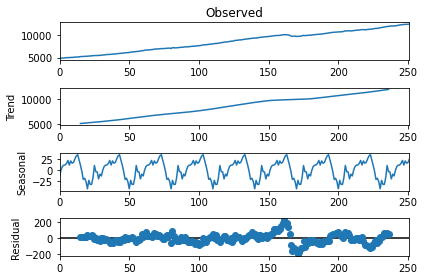

In [3]:
#for multivariate analysis need to check seasonal decomposition for each time dependent variable separately
from statsmodels.tsa.seasonal import seasonal_decompose
cols=df1.columns
for j in cols:
    result=seasonal_decompose(df1[j].values, freq=30)
    result.plot()

AxesSubplot(0.125,0.125;0.775x0.755)


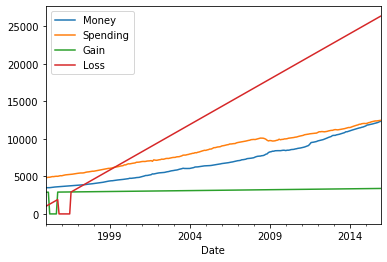

In [6]:
# resampling method & imputation technique is common python code for both univariate & multivariate time series
def resamplingtechnique(df1,weeknum,resamplemethod,resampletype,frequencytype,imputation):
    weekday1= weeknum[len(weeknum)-1]
    def weekdays(weekday1):
        if weekday1 == 0:
            day = 'W-MON'
        elif weekday1 == 1:
            day = 'W-TUE'
        elif weekday1 == 2:
            day = 'W-WED'
        elif weekday1 == 3:
            day = 'W-THU'
        elif weekday1 == 4:
            day = 'W-FRI'
        elif weekday1 == 5:
            day = 'W-SAT'
        elif weekday1 == 6:
            day = 'W-SUN'
        return day
    #valueddata = adfuller_test(df1)
    if resamplemethod == 'no':
        pass
    elif resamplemethod =='upsample':
        if resampletype =='no':
            pass
        elif resampletype =='linear':
            second=df1.resample('S').interpolate(method='linear')
            minute=df1.resample('T').interpolate(method='linear')
            hourly = df1.resample('H').interpolate(method='linear') # two columns( one date column and one target column) as the base data frame.
            daily = df1.resample('D').interpolate(method='linear')
            weekly = df1.resample(weekdays(weekday1)).interpolate(method='linear')
            monthly = df1.resample('M').interpolate(method='linear')
            quarterly = df1.resample('Q').interpolate(method='linear')
            yearly =df1.resample('Y').interpolate(method='linear')

        elif resampletype == 'spline':
            seconds=df1.resample('S').interpolate(method='spline',order=2)
            minutes=df1.resample('T').interpolate(method='spline',order=2)
            hourly = df1.resample('H').interpolate(method='spline',order=2)  # two columns( one date column and one target column) as the base data frame.
            daily = df1.resample('D').interpolate(method='spline', order=2)
            weekly = df1.resample(weekdays(weekday1)).interpolate(method='spline', order=2)
            monthly = df1.resample('M').interpolate(method='spline', order=2)
            quarterly = df1.resample('Q').interpolate(method='spline', order=2)
            yearly = df1.resample('Y').interpolate(method='spline', order=2)
        
        elif resampletype =='polynomial':
            second=df1.resample('S').interpolate(method='polynomial',order=2)
            minute=df1.resample('T').interpolate(method='polynomial',order=2)
            hourly = df1.resample('H').interpolate(method='polynomial',order=2)  # two columns( one date column and one target column) as the base data frame.
            daily = df1.resample('D').interpolate(method='polynomial', order=2)
            weekly = df1.resample(weekdays(weekday1)).interpolate(method='polynomial', order=2)
            monthly = df1.resample('M').interpolate(method='polynomial', order=2)
            quarterly = df1.resample('Q').interpolate(method='polynomial', order=2)
            yearly = df1.resample('Y').interpolate(method='polynomial', order=2)
        
        elif resampletype =='cubic':
            second=df1.resample('S').interpolate(method='cubic')
            minute=df1.resample('T').interpolate(method='cubic')
            hourly = df1.resample('H').interpolate(method='cubic')  # two columns( one date column and one target column) as the base data frame.
            daily = df1.resample('D').interpolate(method='cubic')
            weekly = df1.resample(weekdays(weekday1)).interpolate(method='cubic')
            monthly = df1.resample('M').interpolate(method='cubic')
            quarterly = df1.resample('Q').interpolate(method='cubic')
            yearly = df1.resample('Y').interpolate(method='cubic')
            
        elif resampletype =='quadratic':
            second=df1.resample('S').interpolate(method='quadratic')
            minute=df1.resample('T').interpolate(method='quadratic')
            hourly = df1.resample('H').interpolate(method='quadratic')  # two columns( one date column and one target column) as the base data frame.
            daily = df1.resample('D').interpolate(method='quadratic')
            weekly = df1.resample(weekdays(weekday1)).interpolate(method='quadratic')
            monthly = df1.resample('M').interpolate(method='quadratic')
            quarterly = df1.resample('Q').interpolate(method='quadratic')
            yearly = df1.resample('Y').interpolate(method='quadratic')
            
            
    elif resamplemethod == 'downsample':
        if resampletype == 'no':
            pass
        elif resampletype == 'mean':
            second=df1.resample('S').mean()
            minute=df1.resample('T').mean()
            hourly = df1.resample('H').mean()  
            daily = df1.resample('D').mean()
            weekly = df1.resample(weekdays(weekday1)).mean()
            monthly = df1.resample('M').mean()
            quarterly = df1.resample('Q').mean()
            yearly = df1.resample('Y').mean()

        elif resampletype == 'sum':
            second=df1.resample('S').sum()
            minute=df1.resample('T').sum()
            hourly = df1.resample('H').sum()  
            daily = df1.resample('D').sum()
            weekly = df1.resample(weekdays(weekday1)).sum()
            monthly = df1.resample('M').sum()
            quarterly = df1.resample('Q').sum()
            yearly = df1.resample('Y').sum()
        
        elif resampletype == 'min':
            second=df1.resample('S').min()
            minute=df1.resample('T').min()
            hourly = df1.resample('H').min()  
            daily = df1.resample('D').min()
            weekly = df1.resample(weekdays(weekday1)).min()
            monthly = df1.resample('M').min()
            quarterly = df1.resample('Q').min()
            yearly = df1.resample('Y').min()
        
        elif resampletype =='max':
            second=df1.resample('S').max()
            minute=df1.resample('T').max()
            hourly = df1.resample('H').max() 
            daily = df1.resample('D').max()
            weekly = df1.resample(weekdays(weekday1)).max()
            monthly = df1.resample('M').max()
            quarterly = df1.resample('Q').max()
            yearly = df1.resample('Y').max()
        
        elif resampletype =='count':
            second=df1.resample('S').count()
            minute=df1.resample('T').count()
            hourly = df1.resample('H').count()  
            daily = df1.resample('D').count()
            weekly = df1.resample(weekdays(weekday1)).count()
            monthly = df1.resample('M').count()
            quarterly = df1.resample('Q').count()
            yearly = df1.resample('Y').count()
            
    if frequencytype == 'second':
        if resampletype == 'no':
            pass
        else:
            df2 = second
    elif frequencytype =='minute':
        if resampletype == 'no':
            pass
        else:
            df2 = minute
    elif frequencytype =='hourly':
        if resampletype == 'no':
            pass
        else:
            df2 = hourly
    elif frequencytype == 'daily':
        if resampletype == 'no':
            pass
        else:
            df2 = daily
    elif frequencytype == 'weekly':
        if resampletype == 'no':
            pass
        else:
            df2 = weekly
    elif frequencytype == 'monthly':
        if resampletype == 'no':
            pass
        else:
            df2 = monthly
    elif frequencytype == 'quarterly':
        if resampletype == 'no':
            pass
        else:
            df2 = quarterly
    elif frequencytype == 'yearly':
        if resampletype == 'no':
            pass
        else:
            df2 = yearly

    if imputation == 'no':
        df3 = df1
    elif imputation == 'mean':
        df3 = df2.fillna(df2.mean())
    elif imputation == 'median':
        df3 = df2.fillna(df2.median())
        
    return df3

resamplemethod ='no'
resampletype='no'
frequencytype='monthly'
imputation='no'
df3=resamplingtechnique(df1,weeknum,resamplemethod,resampletype,frequencytype,imputation)
print(df3.plot())

In [4]:
# stationarity check for multivariate analysis using cointegration method
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#from johansen import coint_johansen
coint_johansen(df1,0,1).eig

array([0.1200754 , 0.00229272])

In [5]:
def joh_output(res):
    output = pd.DataFrame([res.lr1],
                          index=["trace_stat"])
    print(output.T,'\n')
    #print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')
# Model 3 (2 lag-difference used = 3 lags VAR or VAR(3) model)
# with constant/trend (deterministc) term
johan_test_temp = df1
#joh_model3 = coint_johansen(johan_test_temp,0,2) # k_ar_diff +1 = K
#joh_output(joh_model3)
# Model 2: with linear trend only
joh_model2 = coint_johansen(johan_test_temp,1,2) # k_ar_diff +1 = K
joh_output(joh_model2)
# Model 1: no constant/trend (deterministc) term
#joh_model1 = coint_johansen(johan_test_temp,-1,2) # k_ar_diff +1 = K
#joh_output(joh_model1)

   trace_stat
0    3.522913
1    0.000568 

Critical values(90%, 95%, 99%) of trace_stat
 [[16.1619 18.3985 23.1485]
 [ 2.7055  3.8415  6.6349]] 



In [9]:
def timeseries_models(df3,algorithm,ratio,future_period):
    cols=df3.columns
    train_size = int(len(df3) * ratio)
    train, test = df3[0:train_size], df3[train_size:len(df3)]
    #algorithmn = input('Enter algorithm to use:')
 
    if algorithm =='VAR':
        model = VAR(endog=train)
        model_fit = model.fit()
        pred = model_fit.forecast(model_fit.y, steps=len(test))
        prediction = pd.DataFrame(index=test.index,columns=cols)
        for j in range(0,len(train.columns)):
            for i in range(0, len(pred)):
                prediction.iloc[i][j] = pred[i][j]
        future_forecast=model_fit.forecast(model_fit.y, steps=future_period)
    elif algorithm =='VARMA':
        p=int(input('value of p:'))
        q=int(input('value of q:'))
        model = VARMAX(endog=train, order=(p, q))
        model_fit = model.fit()
        prediction = model_fit.forecast(steps=len(test),index=test.index)
        future_forecast = model_fit.forecast(steps=future_period)
    elif algorithm =='VARMAX':
        p=int(input('value of p:'))
        q=int(input('value of q:'))
        model=VARMAX(endog=train,exog=train[exog],order=(p,q))
        model_fit = model.fit()
        prediction=pd.DataFrame(model_fit.predict(steps=len(test),exog=test[exog],columns=test.columns))
        future_forecast=model_fit.forecast(steps=future_period)
        
    for i in cols:
        print('MAE value for', i, 'is : ', mean_absolute_error(prediction[i], test[i]))
        print('RMSE value for', i, 'is : ', sqrt(mean_squared_error(prediction[i], test[i])))
        print('MAPE value for',i,'is : ',np.mean(np.abs((test[i].values - prediction[i].values) / test[i].values)) * 100)
        
    return train,test,prediction,future_forecast

algorithm='VAR'
ratio=0.80
future_period=10
train,test,prediction,future_forecast=timeseries_models(df1,algorithm,ratio,future_period)
                                                        

MAE value for Money is :  80.93426580751218
RMSE value for Money is :  90.96611601804848
MAPE value for Money is :  0.7263464703014849
MAE value for Spending is :  174.7046589234442
RMSE value for Spending is :  247.0771966723412
MAPE value for Spending is :  1.449714815555621


            Money  Spending  Gain
Date                             
2015-12-31   9588     10747  3293
2016-01-31   9638     10757  3295
2016-02-29   9687     10767  3297
2016-03-31   9737     10777  3299
2016-04-30   9787     10786  3301
2016-05-31   9837     10796  3303
2016-06-30   9887     10805  3305
2016-07-31   9938     10814  3307
2016-08-31   9988     10823  3309
2016-09-30  10039     10832  3311


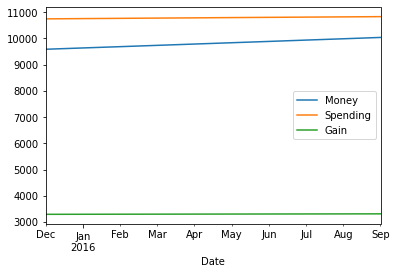

In [24]:
def futureforecast(test,future_forecast,future_period):
    predict_period = future_period
    if frequencytype=='second':
        future_dates=pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='S')
    if frequencytype == 'minute':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='T')
    elif frequencytype == 'hourly':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='H')
    elif frequencytype == 'daily':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='D')
    elif frequencytype == 'weekly':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq=weekdays(weekday1))
    elif frequencytype == 'monthly':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='M')
    elif frequencytype == 'quarterly':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='Q')
    elif frequencytype == 'yearly':
        future_dates = pd.date_range(start=str(test.index[-1]), periods=predict_period, freq='Y')

    final_df = pd.DataFrame(future_forecast.astype(int),columns=targcol)
    final_df[datecol] = future_dates
    final_df.set_index(datecol,inplace = True)
    print(final_df)
    final_df.plot()
    return final_df

future_period= 10
final_df=futureforecast(test,future_forecast,future_period)

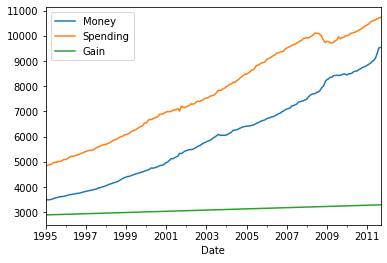

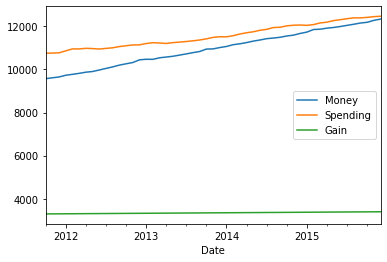

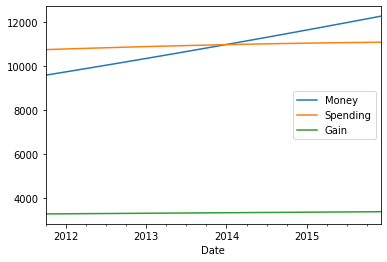

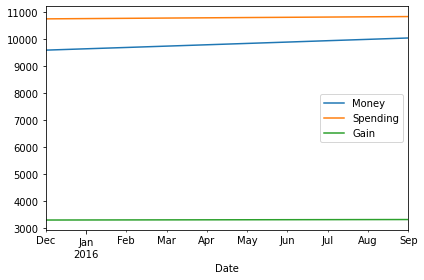

In [21]:
train.plot()
test.plot()
prediction.plot()
final_df.plot()
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
cols=df3.columns
train_size = int(len(df3) * 0.80)
train, test = df3[0:train_size], df3[train_size:len(df3)]
    #algorithmn = input('Enter algorithm to use:')
model = VAR(endog=train[targcol])
model_fit = model.fit()
pred = model_fit.forecast(model_fit.y, steps=len(test[targcol]))
prediction = pd.DataFrame(pred,index=test.index,columns=targcol)
print(prediction.head())
#for j in range(0,len(train.columns)):
#    for i in range(0, len(pred)):
#        prediction.iloc[i][j] = pred[i][j]
future_forecast=model_fit.forecast(model_fit.y, steps=12)
print(future_forecast)

                  Money      Spending         Gain          Loss
Date                                                            
2011-10-01  9587.192784  10759.684413  3269.007097  21340.323644
2011-11-01  9635.115751  10781.322456  3251.421317  21478.449315
2011-12-01  9683.262486  10803.007491  3237.332387  21614.578806
2012-01-01  9731.627843  10824.732042  3226.009356  21748.891775
2012-02-01  9780.207700  10846.488108  3216.865629  21881.548749
[[ 9587.19278388 10759.68441252  3269.00709721 21340.32364362]
 [ 9635.11575057 10781.32245628  3251.42131651 21478.44931528]
 [ 9683.26248589 10803.00749057  3237.33238736 21614.57880596]
 [ 9731.6278434  10824.73204194  3226.00935584 21748.89177502]
 [ 9780.20769953 10846.48810822  3216.86562933 21881.54874929]
 [ 9828.99875617 10868.26739292  3209.43080716 22012.69363701]
 [ 9877.99838129 10890.06148438  3203.32798197 22142.45584342]
 [ 9927.20448043 10911.86199114  3198.25545133 22270.9520586 ]
 [ 9976.61539295 10933.66064261  3193.971